In [1]:
import numpy as np

import matplotlib.ticker as ticker
import matplotlib.pylab as plt

import aplpy
import pylab as pl

import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy import units as u

from spectral_cube import SpectralCube

from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord

from matplotlib.patches import Ellipse

In [3]:
cube_N2Dp=SpectralCube.read('/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/N2Dp/HOPS164_N2Dp_Tp12m7m_large_Combine_pbcor.fits')
cube_N2Dp = cube_N2Dp.to(u.K).with_spectral_unit(u.km/u.s)

cube_H2CO=SpectralCube.read('/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/H2CO/HOPS164_H2CO_Tp12m7m_Combine_pbcor_masked.fits')
cube_H2CO = cube_H2CO.to(u.K).with_spectral_unit(u.km/u.s)

cube_C18O=SpectralCube.read('/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/C18O/HOPS164_C18O_Tp12m7m_Combine_pbcor_masked.fits')
cube_C18O = cube_C18O.to(u.K).with_spectral_unit(u.km/u.s)

cube_13CO=SpectralCube.read('/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/13CO/HOPS164_13CO_Tp12m7m_Combine_pbcor_masked.fits')
cube_13CO = cube_13CO.to(u.K).with_spectral_unit(u.km/u.s)

cube_12CO=SpectralCube.read('/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/CO/HOPS164_CO_Tp12m7m_Combine_pbcor_masked.fits')
cube_12CO.allow_huge_operations = True 
cube_12CO = cube_12CO.to(u.K).with_spectral_unit(u.km/u.s)

cube_robust = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/Continuum/HOPS-164_cont_robust0.5.pbcor.fits'
cube_robust = SpectralCube.read(cube_robust)

hdul = fits.open('/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/Continuum/HOPS-164_Continuum_natural_thres0.4mJy.pbcor.fits')
data = hdul[0].data
header = hdul[0].header


In [2]:
# Mask out NaNs
masked_data = np.nan_to_num(data, nan=-np.inf)

# Find brightest pixel
max_pos = np.unravel_index(np.argmax(masked_data), data.shape)

# Load WCS
wcs = WCS(header)

# Convert pixel to world coordinates (ICRS)
sky_coord = wcs.pixel_to_world(*max_pos[::1])  # reverse index order for (x, y, [z])

print(f"Brightest pixel value: {data[max_pos]}")
print(f"Pixel position: {max_pos}")
print(f"ICRS coordinates: {sky_coord.to_string('hmsdms')}")

NameError: name 'data' is not defined

In [3]:
# Actual coordinates for center of the protostar
# marker_coord = SkyCoord("5h37m00.427s", "-6d37m10.919s", frame='icrs')

# Coordinates that APPEAR at the center of the protostar in ALMA data
marker_coord = SkyCoord("5h37m00.543s", "-6d37m10.91s", frame='icrs')

# Coordinates that APPEAR at the center of the protostar in Tobin et. al. data
# marker_coord = SkyCoord("5h37m00.483s", "-6d37m10.9s", frame='icrs')

# Create a sky offset frame centered on the marker
offset_frame = marker_coord.skyoffset_frame()

# Transform it to the same offset frame as your image
marker_offset = marker_coord.transform_to(offset_frame)

def plot_contours(data_array, color, min_level, max_level, number_of_levels):
    gamma = 2.0
    scaled_levels = np.linspace(0, 1, number_of_levels) ** gamma
    levels = min_level + (max_level - min_level) * scaled_levels

    return ax.contour(
        data_array,
        levels=levels,
        colors=color,
        linewidths=0.5,
        origin='lower',
        extent=[
            ra_offsets.min(), ra_offsets.max(),
            dec_offsets.min(), dec_offsets.max()
        ],
    )

def beam(beam_minor, beam_major, beam_pa, beam_position):
    # Set beam location
    beam_x = ra_offsets.min() + beam_position  
    beam_y = dec_offsets.min() + beam_position

    # Create the beam ellipse
    return Ellipse(
        (beam_x, beam_y),
        width=beam_major,
        height=beam_minor,
        angle=beam_pa,
        edgecolor='black',
        facecolor='none',
        alpha=0.7,
        zorder=10
    )



# Checking Center of Protostar

In [4]:
# Find x and y pixel for the protostar marker
x_marker, y_marker = skycoord_to_pixel(marker_coord, wcs=wcs)
print(f"Marker pixel position: ({x_marker}, {y_marker})")

# Convert those pixels back to sky coordinates
marker_pixel_coord = pixel_to_skycoord(x_marker, y_marker, wcs=wcs)
print(marker_pixel_coord.icrs.to_string('hmsdms'))

NameError: name 'wcs' is not defined

# Read Beam Sizes 

In [5]:
# Load the FITS file
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/N2Dp/HOPS164_N2Dp_large_sm_reb.fits'
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/N2Dp/HOPS164_N2Dp_Tp12m7m_large_Combine_pbcor.fits'
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/H2CO/HOPS164_H2CO_Tp12m7m_Combine_pbcor_masked.fits'
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/C18O/HOPS164_C18O_Tp12m7m_Combine_pbcor_masked.fits'
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/13CO/HOPS164_13CO_Tp12m7m_Combine_pbcor_masked.fits'
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/CO/HOPS164_CO_Tp12m7m_Combine_pbcor_masked.fits'
# fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/Continuum/HOPS-164_cont_robust0.5.pbcor.fits'
fits_file = '/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/Continuum/HOPS-164_Continuum_natural_thres0.4mJy.pbcor.fits'

hdu = fits.open(fits_file)[0]  # Open the primary HDU
wcs = WCS(hdu.header)          # Extract WCS projection

header = hdu.header

# Extract beam parameters and convert degrees to arcseconds
bmaj = header.get('BMAJ', 0) * 3600  # major axis in arcsec
bmin = header.get('BMIN', 0) * 3600  # minor axis in arcsec
bpa  = header.get('BPA', 0)          # position angle in degrees

print(f"Beam major axis: {bmaj:.2f}\"")
print(f"Beam minor axis: {bmin:.2f}\"")
print(f"Beam position angle: {bpa:.2f}°")

Beam major axis: 1.20"
Beam minor axis: 0.97"
Beam position angle: 85.18°


# Robust Disk

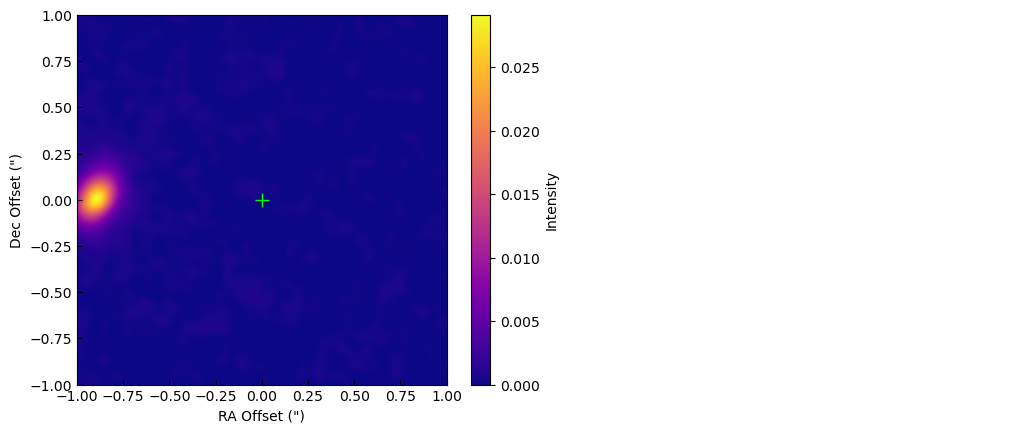

In [9]:
# Access robust data
data_robust = cube_robust.hdu.data

# Convert pixel grid to world coordinates
nx = cube_robust.shape[1]
ny = cube_robust.shape[2]
y_pix, x_pix = np.mgrid[:ny, :nx]
sky = pixel_to_skycoord(x_pix, y_pix, cube_robust.wcs.celestial)

# Convert sky coordinates to offset frame
offset_coords = sky.transform_to(offset_frame)
ra_offsets = offset_coords.lon.arcsec
dec_offsets = offset_coords.lat.arcsec

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_robust[0].data, origin='lower', cmap='plasma', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
# plot_contours(data_robust[0].data, 'black', 0.005, 0.025, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Add beam
beam_robust = beam(0.10, 0.10, -18.29, 1)
ax.add_patch(beam_robust)

# Set offset range
ax.set_xlim(-1, 1) 
ax.set_ylim(-1, 1)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 4.5    # 5" from left
y_start = ax.get_ylim()[0] + 0.5    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 1  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='white', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.1, "420 AU",
        color='white', ha='center', va='bottom', fontsize=10)

# Save figure
# plt.savefig("HOPS164_0.5_robust_contour_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# Continuum

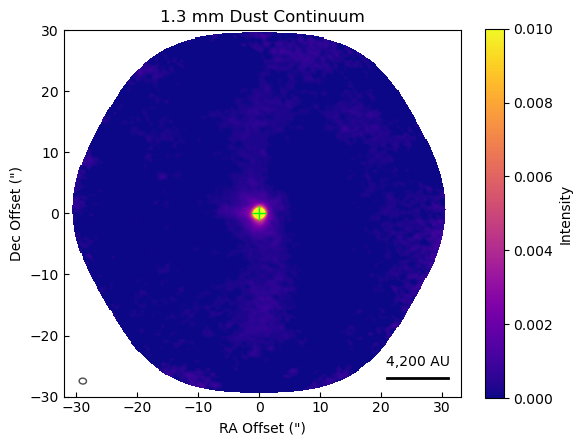

In [11]:
# Load the FITS file
fits_path = "/Users/ivarismartinez/Desktop/Research/REU23/ALMA/HOPS164/Continuum/HOPS-164_Continuum_natural_thres0.4mJy.pbcor.fits"
hdu = fits.open(fits_path)[0]  # Assuming the image is in the primary HDU

# Extract the WCS (only the celestial part, i.e. RA/Dec)
wcs = WCS(hdu.header).celestial

# Convert pixel grid to world coordinates
nx = 448
ny = 448
y_pix, x_pix = np.mgrid[:ny, :nx]
sky = pixel_to_skycoord(x_pix, y_pix, wcs=wcs)

# Convert sky coordinates to offset frame
offset_coords = sky.transform_to(offset_frame)
ra_offsets = offset_coords.lon.arcsec
dec_offsets = offset_coords.lat.arcsec

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(hdu.data, origin='lower', cmap='plasma', vmin=0, vmax=0.01, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
# plot_contours(hdu.data, 'white', 0, 0.0015, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title('1.3 mm Dust Continuum')

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Add beam
beam_continuum = beam(1.20, 0.97, 85.18, 10)
ax.add_patch(beam_continuum)

# Set offset limits
ax.set_xlim(-32, 33)  
ax.set_ylim(-30, 30)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 53    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 1.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Saave image
# plt.savefig("HOPS164_1.3_continnum.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# N2D+

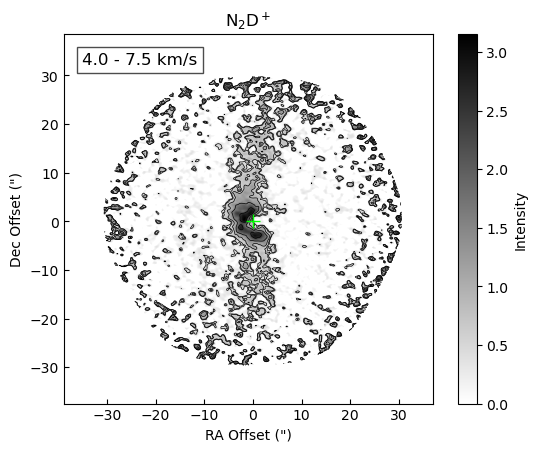

In [12]:
v_min_N2Dp = 4.0
v_max_N2Dp = 7.5

# Chose channels with emission
slab_N2Dp = cube_N2Dp.spectral_slab(v_min_N2Dp*u.km/u.s, v_max_N2Dp*u.km/u.s)

# Create moment 0 map
moment0 = slab_N2Dp.moment(order=0)

# Access moment 0 data
data_N2Dp = moment0.hdu.data  # assuming 2D

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_N2Dp, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_N2Dp, color='black', min_level=0.4, max_level=2.5, number_of_levels=5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Add labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'N$_2$D$^+$')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{v_min_N2Dp:.1f} - {v_max_N2Dp:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# # Add it to the plot
# beam_N2Dp = beam(1.22, 0.98, 84.98, 10)
# ax.add_patch(beam_N2Dp)

# # Set offset limits
# ax.set_xlim(-32, 33) 
# ax.set_ylim(-30, 31)

# # Set starting point for the scale bar (in arcseconds)
# x_start = ax.get_xlim()[0] + 53    # 5" from left
# y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
# ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
# ax.text(x_start + scale_bar_length / 2, y_start + 1.5, "4,200 AU",
#         color='black', ha='center', va='bottom', fontsize=10)

# Save image
# plt.savefig("HOPS164_N2Dp_contour_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# 12CO

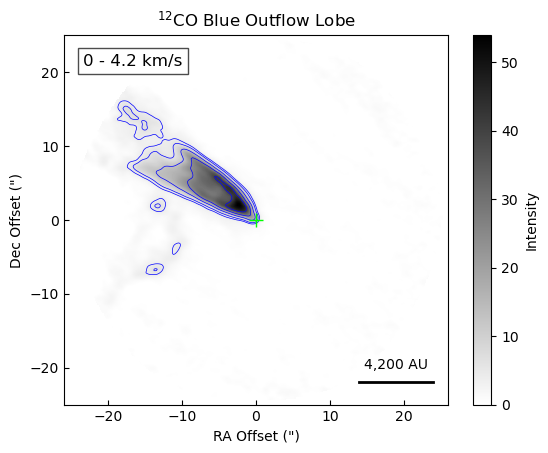

In [ ]:
# Chose channels with emission
slab_12CO_blue = cube_12CO.spectral_slab(0*u.km/u.s, 4.2*u.km/u.s)

# Create moment 0 map
moment0 = slab_12CO_blue.moment(order=0)

# Access moment 0 data
data_12CO_blue = moment0.hdu.data  # assuming 2D

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_12CO_blue, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_12CO_blue, 'blue', 4, 40, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'$^{12}$CO Blue Outflow Lobe')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{0:.0f} - {4.2:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Set offset limits
ax.set_xlim(-26, 26)
ax.set_ylim(-25, 25)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 40    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

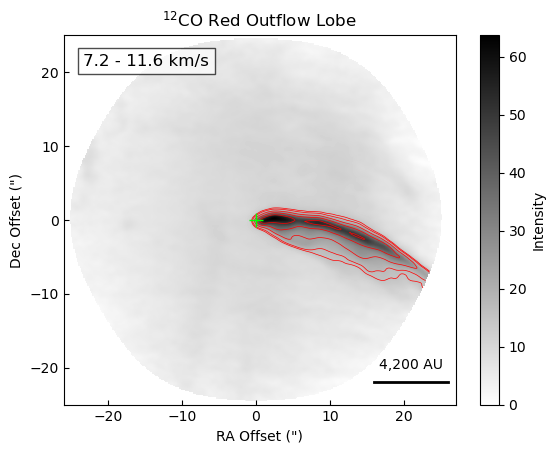

In [ ]:
slab_12CO_red = cube_12CO.spectral_slab(7.2*u.km/u.s, 11.6*u.km/u.s)

moment0 = slab_12CO_red.moment(order=0)
data_12CO_red = moment0.hdu.data  # assuming 2D

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_12CO_red, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

plot_contours(data_12CO_red, 'red', 15, 50, 5)

# Plot the marker on the existing plot
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'$^{12}$CO Red Outflow Lobe')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{7.2:.1f} - {11.6:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Set offset limits
ax.set_xlim(-26, 27) 
ax.set_ylim(-25, 25)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 42    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

plt.colorbar(im, ax=ax, label='Intensity')

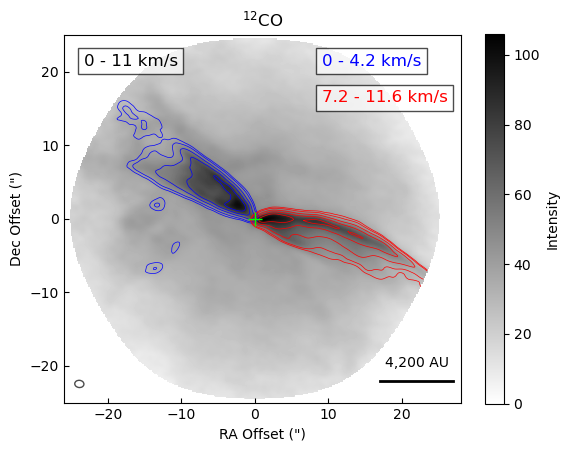

In [ ]:
# Chose channels with emission
slab_12CO = cube_12CO.spectral_slab(0*u.km/u.s, 11.0*u.km/u.s)

# Create moment 0 map
moment0 = slab_12CO.moment(order=0)

# Access moment 0 data
data_12CO = moment0.hdu.data  

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_12CO, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_12CO_blue, 'blue', 4, 40, 5)
plot_contours(data_12CO_red, 'red', 15, 50, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'$^{12}$CO')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{0:.0f} - {11.0:.0f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', color = 'black', bbox=dict(facecolor='white', alpha=0.7))
ax.text(0.65, 0.95, f"{0:.0f} - {4.2:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', color = 'blue', bbox=dict(facecolor='white', alpha=0.7))
ax.text(0.65, 0.85, f"{7.2:.1f} - {11.6:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', color = 'red', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Add beam
beam_12CO = beam(1.25, 0.98, 84.20, 15)
ax.add_patch(beam_12CO)

# Set offset limits
ax.set_xlim(-26, 28)
ax.set_ylim(-25, 25)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 43    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Save image
plt.savefig("HOPS164_12CO_contour_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# H2CO

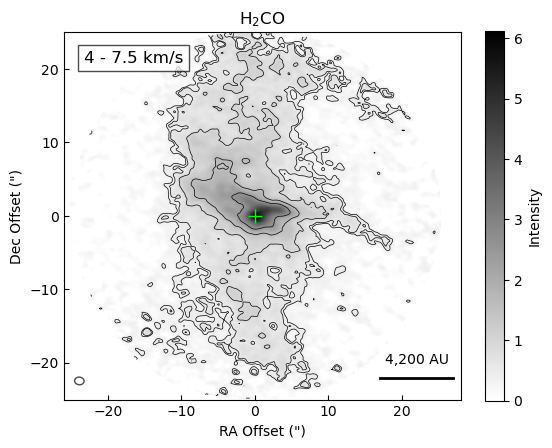

In [ ]:
# Chose channels with emission
slab_H2CO = cube_H2CO.spectral_slab(4.0*u.km/u.s, 7.5*u.km/u.s)

# Create moment 0 map
moment0 = slab_H2CO.moment(order=0)

# Access moment 0 data
data_H2CO = moment0.hdu.data  # assuming 2D

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_H2CO, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_H2CO, 'black', 0.4, 2.5, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'H$_2$CO')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{4.0:.0f} - {7.5:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Add beam
beam_H2CO = beam(1.29, 1.04, 83.63, 15)
ax.add_patch(beam_H2CO)

# Set offset limits
ax.set_xlim(-26, 28) 
ax.set_ylim(-25, 25)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 43    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Save image
# plt.savefig("HOPS164_H2CO_contour_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# 13CO

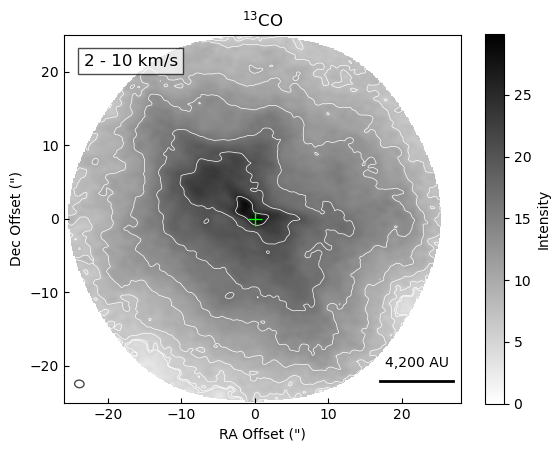

In [ ]:
# Chose channels with emission
slab_13CO = cube_13CO.spectral_slab(2.0*u.km/u.s, 10.0*u.km/u.s)

# Create moment 0 map
moment0 = slab_13CO.moment(order=0)

# Access moment 0 data
data_13CO = moment0.hdu.data  # assuming 2D

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_13CO, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_13CO.data, 'white', 5, 25, 9)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'$^{13}$CO')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{2:.0f} - {10:.0f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Add beam
beam_13CO = beam(1.29, 1.03, 84.42, 15)
ax.add_patch(beam_13CO)

# Set offset limits
ax.set_xlim(-26, 28) 
ax.set_ylim(-25, 25)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 43    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Save image
plt.savefig("HOPS164_13CO_contour_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# C18O

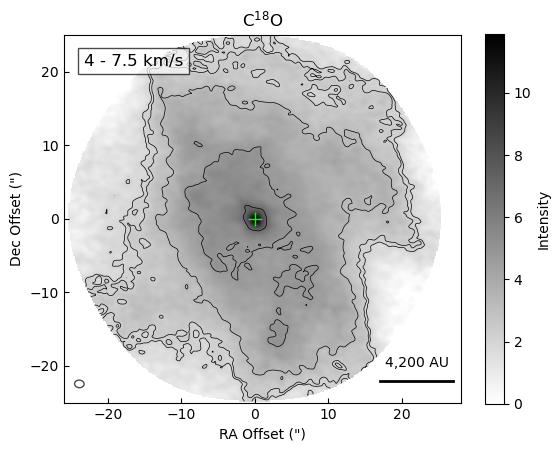

In [ ]:
# Chose channels with emision
slab_C18O = cube_C18O.spectral_slab(4.0*u.km/u.s, 7.5*u.km/u.s)

# Create moment 0 map
moment0 = slab_C18O.moment(order=0)
data_C18O = moment0.hdu.data  # assuming 2D

# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_C18O, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_C18O.data, 'black', 2, 7, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title(r'C$^{18}$O')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{4.0:.0f} - {7.5:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Add beam
beam_C18O = beam(1.30, 1.03, 85.77, 15)
ax.add_patch(beam_C18O)

# Set offset limits
ax.set_xlim(-26, 28) 
ax.set_ylim(-25, 25)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 43    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 0.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Save image
plt.savefig("HOPS164_C18O_contour_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()

# Circumstellar Environment Map

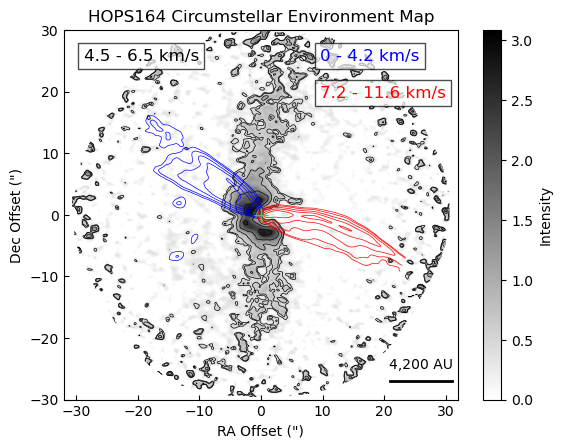

In [56]:
# Plot using offsets
fig, ax = plt.subplots()
im = ax.imshow(data_N2Dp, origin='lower', cmap='binary', vmin=0, extent=[
    ra_offsets.min(), ra_offsets.max(),
    dec_offsets.min(), dec_offsets.max()
])

# Plot contours
plot_contours(data_N2Dp, 'black', 0.4, 2.5, 5)
plot_contours(data_12CO_blue, 'blue', 4, 40, 5)
plot_contours(data_12CO_red, 'red', 15, 50, 5)

# Plot the protostar marker
ax.plot(0, 0, marker='+', color='lime', markersize=10, label='Marker')

# Set labels
ax.set_xlabel('RA Offset (")')
ax.set_ylabel('Dec Offset (")')
ax.set_title('HOPS164 Circumstellar Environment Map')

# Add velocity label in the top left of the subplot
ax.text(0.05, 0.95, f"{4.5:.1f} - {6.5:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
ax.text(0.65, 0.95, f"{0:.0f} - {4.2:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', color = 'blue', bbox=dict(facecolor='white', alpha=0.7))
ax.text(0.65, 0.85, f"{7.2:.1f} - {11.6:.1f} km/s", transform=ax.transAxes, fontsize=12, verticalalignment='top', color = 'red', bbox=dict(facecolor='white', alpha=0.7))

# Move ticks inside
ax.tick_params(axis='both', direction='in', which='both')

# Add colorbar
plt.colorbar(im, ax=ax, label='Intensity')

# Set offset limits
ax.set_xlim(-32, 32)
ax.set_ylim(-30, 30)

# Set starting point for the scale bar (in arcseconds)
x_start = ax.get_xlim()[0] + 53    # 5" from left
y_start = ax.get_ylim()[0] + 3    # 5" from bottom

# Length of the bar in arcseconds
scale_bar_length = 10  # arcseconds

# Plot the scale bar
ax.plot([x_start, x_start + scale_bar_length], [y_start, y_start], color='black', linewidth=2)

# Label it
ax.text(x_start + scale_bar_length / 2, y_start + 1.5, "4,200 AU",
        color='black', ha='center', va='bottom', fontsize=10)

# Save image
plt.savefig("HOPS164_circumstellar_environment_map.png", format="png", dpi=300, bbox_inches="tight")

# Close imshow
plt.show()